## Aufgabe 1 : Schätzung und Test im bivariaten Modell ##

**Verwendeter Datensatz:** https://www.kaggle.com/datasets/mirichoi0218/insurance

**Ziel:** Vorhersage medizinischer Kosten auf Basis verschiedener unabhängiger Variablen

**Allgemeines Vorgehen:**
1. Daten laden und aufbereiten
2. EDA
3. Modellspezifikation
4. Modellschätzung
5. Modellbewertung
6. Hypothesentest
7. Interpretation der Ergebnisse


In [3]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
from scipy import stats
from sklearn.feature_selection import f_regression
import statsmodels.api as sm

1. Daten laden und aufbereiten (Daten bereinigen/transformieren und fehlende Werte beseitigen)

In [4]:
# load database
insurance_data = pd.read_csv('insurance.csv')
print(insurance_data.head())
print()
print("shape: ", insurance_data.shape)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

shape:  (1338, 7)


In [5]:
# get general information
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# missing data points
print('Missing data points:')
print(insurance_data.isnull().sum())

Missing data points:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [7]:
# one hot encoding for cat values
### TO BE DONE

2. EDA (Verteilung der Variablen verstehen und potenzielle Beziehungen zwischen den Variablen identifizieren)

In [8]:
# Summary statistics
print('Summary statistics:')
insurance_data.describe().round(2)

Summary statistics:


,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


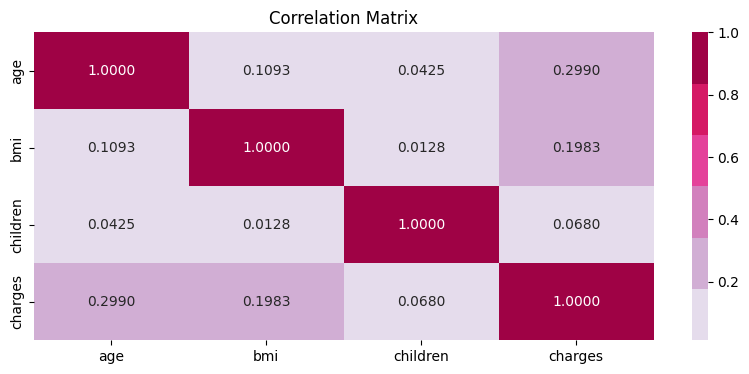

In [9]:
# Data Visualization

num_values = insurance_data.select_dtypes(include=[np.number]) # leave out cat values

# Correlation Matrix
correlation_matrix = num_values.corr()

colormap = sns.color_palette("PuRd") 

plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, cmap = colormap, annot=True, fmt=".4f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

Korrelationsplot zeigt, dass die abhängige Variable charges am meisten mit Age (0,299) und bmi(0,19) korreliert.
Die unabhängigen Variablen korrilieren untereinander schwächer (bis 0,10) sodass davon auszugehen ist dass wir keine interdependenzne haben

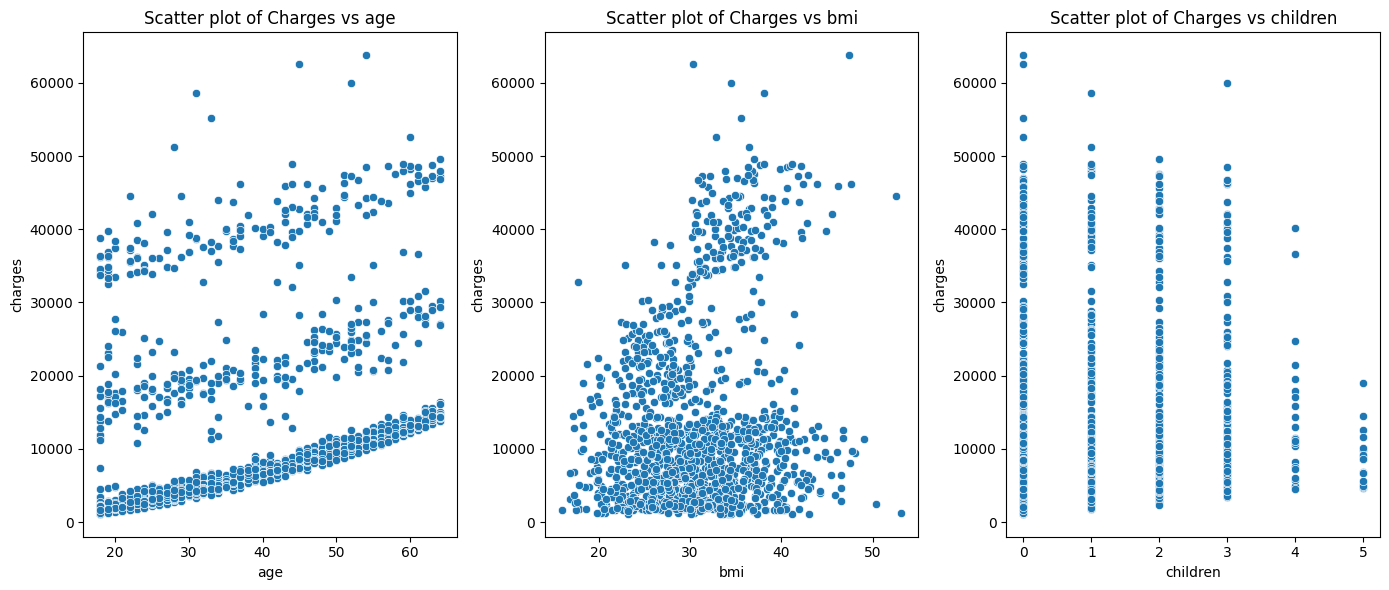

In [10]:
# Scatter plot of independent variables vs. dependent variable with highest correlation

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(131)
sns.scatterplot(x='age',y='charges',data=insurance_data,ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(132)
sns.scatterplot(x='bmi',y='charges',data=insurance_data)
ax.set_title('Scatter plot of Charges vs bmi')

ax = f.add_subplot(133)
sns.scatterplot(x='children',y='charges',data=insurance_data)
ax.set_title('Scatter plot of Charges vs children')

plt.tight_layout()
plt.show()

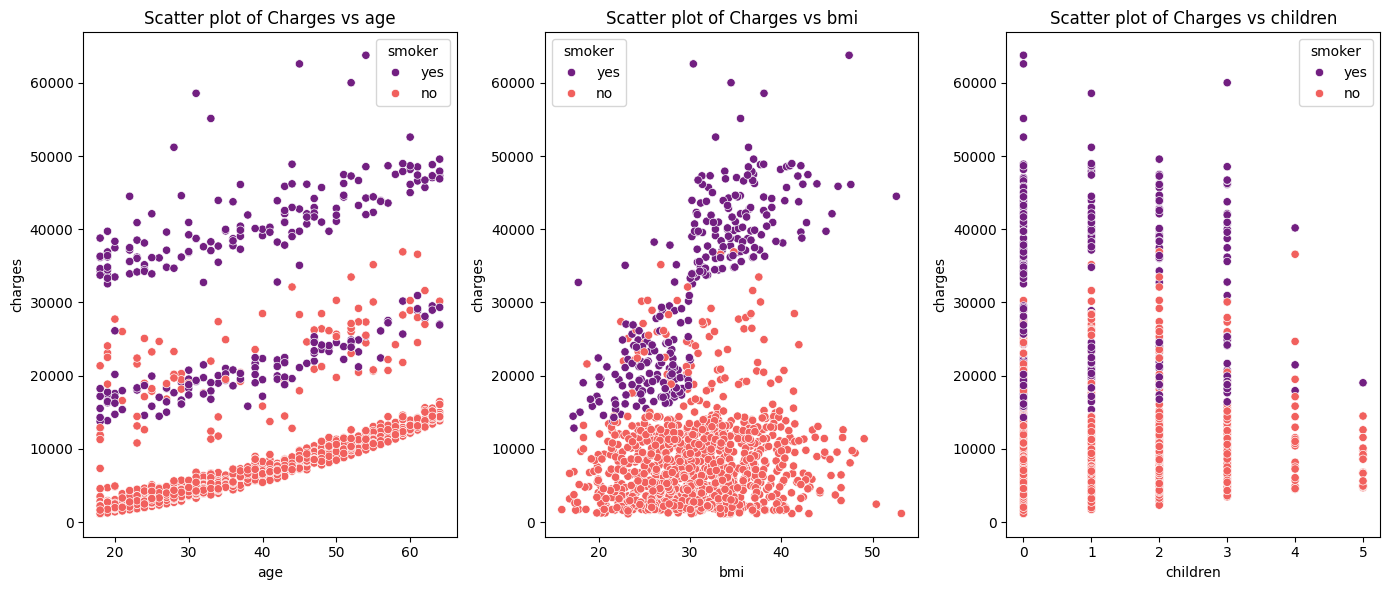

In [11]:
# Scatter plot of independent variables vs. dependent variable with highest correlation including categorical value smoker

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(131)
sns.scatterplot(x='age',y='charges',data=insurance_data,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(132)
sns.scatterplot(x='bmi',y='charges',data=insurance_data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')

ax = f.add_subplot(133)
sns.scatterplot(x='children',y='charges',data=insurance_data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of Charges vs children')

plt.tight_layout()
plt.show()

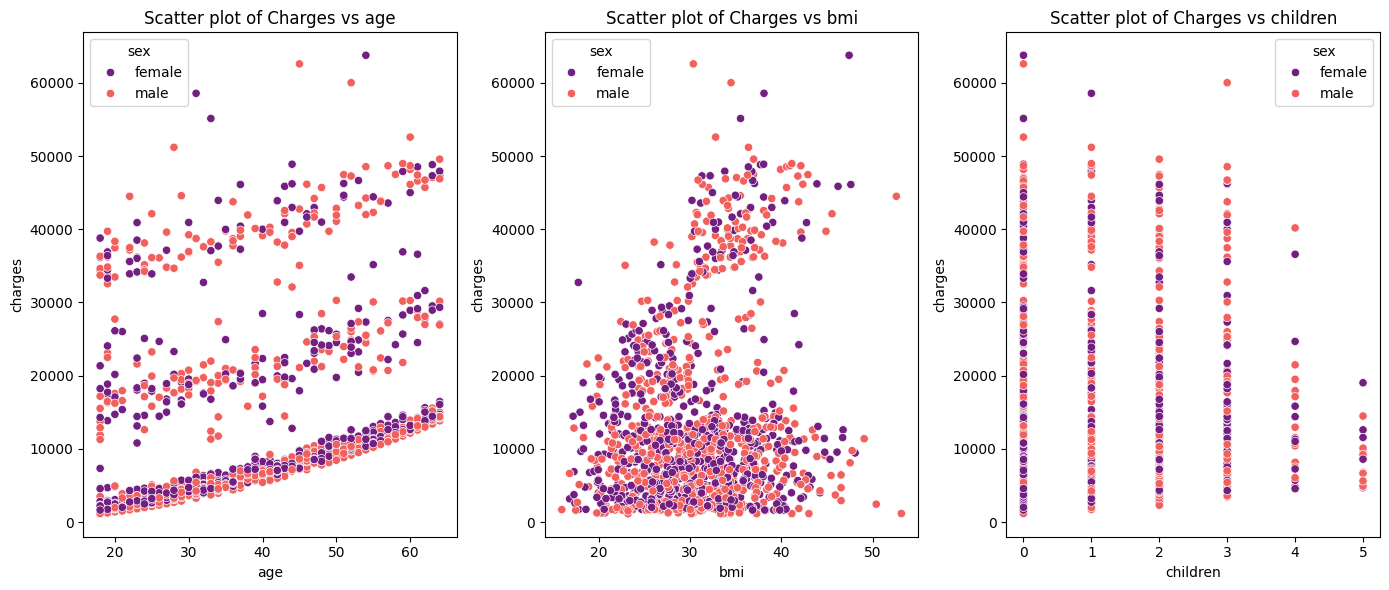

In [12]:
# Scatter plot of independent variables vs. dependent variable with highest correlation including categorical value sex

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(131)
sns.scatterplot(x='age',y='charges',data=insurance_data,palette='magma',hue='sex',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(132)
sns.scatterplot(x='bmi',y='charges',data=insurance_data,palette='magma',hue='sex')
ax.set_title('Scatter plot of Charges vs bmi')

ax = f.add_subplot(133)
sns.scatterplot(x='children',y='charges',data=insurance_data,palette='magma',hue='sex')
ax.set_title('Scatter plot of Charges vs children')

plt.tight_layout()
plt.show()

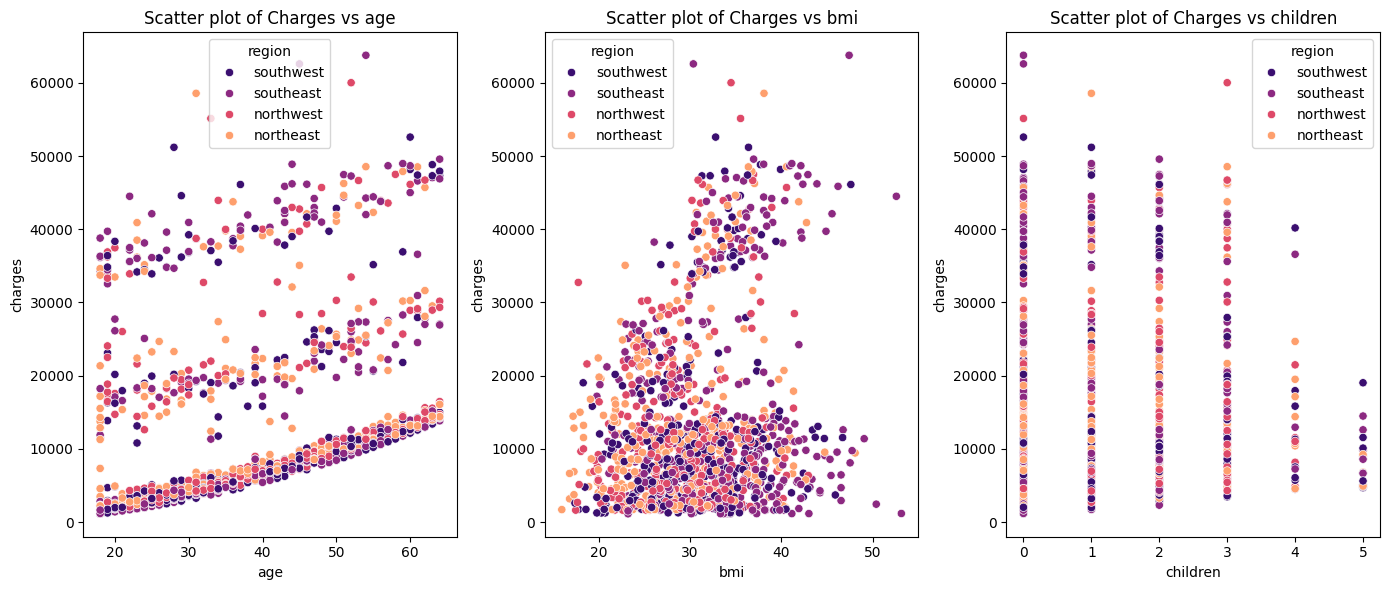

In [13]:
# Scatter plot of independent variables vs. dependent variable with highest correlation including categorical value region

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(131)
sns.scatterplot(x='age',y='charges',data=insurance_data,palette='magma',hue='region',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(132)
sns.scatterplot(x='bmi',y='charges',data=insurance_data,palette='magma',hue='region')
ax.set_title('Scatter plot of Charges vs bmi')

ax = f.add_subplot(133)
sns.scatterplot(x='children',y='charges',data=insurance_data,palette='magma',hue='region')
ax.set_title('Scatter plot of Charges vs children')

plt.tight_layout()
plt.show()

Es scheint einen linearen Zusammenhang zu geben, insbesondere, wenn die Klasse Smoker mit einbezogen wird (multivariate Analyse)

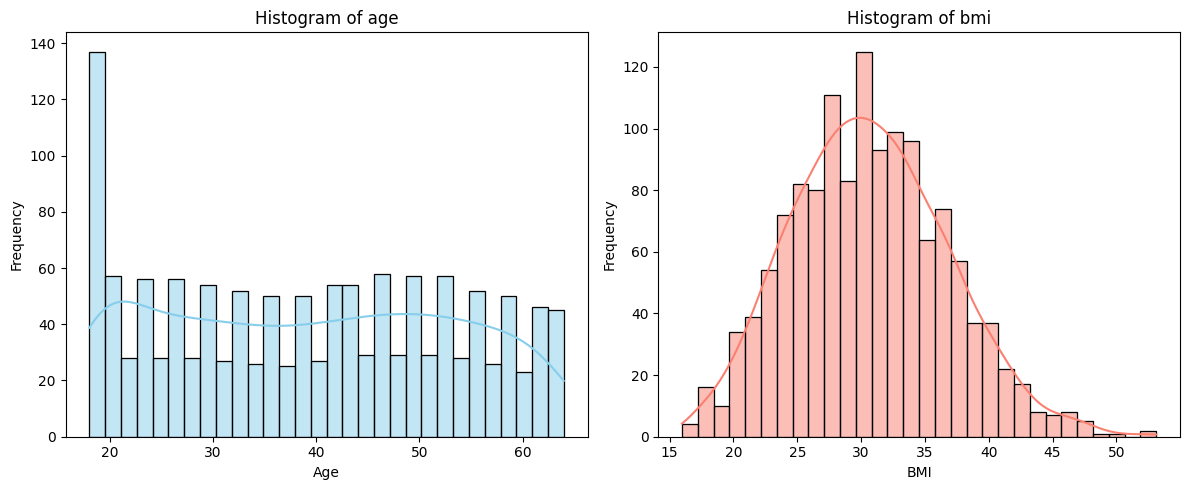

In [14]:
# Create a figure and subplots
plt.figure(figsize=(12, 5))

# Histogram of age
plt.subplot(1, 2, 1)
sns.histplot(insurance_data['age'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram of bmi
plt.subplot(1, 2, 2)
sns.histplot(insurance_data['bmi'], bins=30, kde=True, color='salmon')
plt.title('Histogram of bmi')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

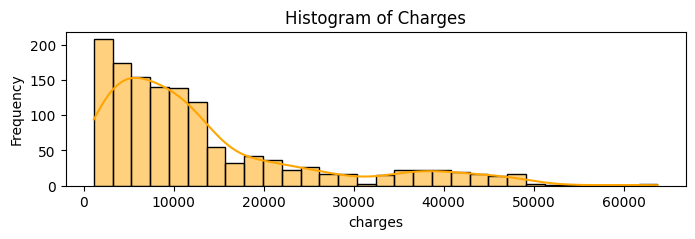

In [15]:
# Histogram of dependent variable charges
plt.figure(figsize=(8, 2))
sns.histplot(insurance_data['charges'], bins=30, kde=True, color = "orange")
plt.title('Histogram of Charges')
plt.xlabel('charges')
plt.ylabel('Frequency')
plt.show()


___

3. Modellspezifikation (bivariates Modell mit zugehörigen Variablen definieren)

In [18]:
## statsmodels summary

X_age = insurance_data[['age']]
y = insurance_data['charges']

model_age = sm.OLS(y, X_age).fit()
print(model_age.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.583
Model:                            OLS   Adj. R-squared (uncentered):              0.583
Method:                 Least Squares   F-statistic:                              1868.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                   3.95e-256
Time:                        17:16:09   Log-Likelihood:                         -14421.
No. Observations:                1338   AIC:                                  2.884e+04
Df Residuals:                    1337   BIC:                                  2.885e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [19]:
X_bmi = insurance_data[['bmi']]
model_bmi = sm.OLS(y, X_bmi).fit()
print(model_bmi.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.564
Model:                            OLS   Adj. R-squared (uncentered):              0.563
Method:                 Least Squares   F-statistic:                              1726.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                   6.10e-243
Time:                        17:16:19   Log-Likelihood:                         -14451.
No. Observations:                1338   AIC:                                  2.890e+04
Df Residuals:                    1337   BIC:                                  2.891e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
X_children = insurance_data[['children']]
model_children = sm.OLS(y, X_children).fit()
print(model_children.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.282
Model:                            OLS   Adj. R-squared (uncentered):              0.281
Method:                 Least Squares   F-statistic:                              524.3
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                    3.64e-98
Time:                        17:16:31   Log-Likelihood:                         -14784.
No. Observations:                1338   AIC:                                  2.957e+04
Df Residuals:                    1337   BIC:                                  2.958e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

___

In [152]:
# Split the dataset into train and test sets
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(insurance_data[['age']], insurance_data['charges'], test_size=0.2, random_state=42)
X_train_bmi, X_test_bmi, y_train_bmi, y_test_bmi = train_test_split(insurance_data[['bmi']], insurance_data['charges'], test_size=0.2, random_state=42)

In [153]:
# Specify the model (bivariate linear regression)

# Fit the linear regression model for age
lm_age = LinearRegression()
lm_age.fit(X_train_age, y_train_age)

# Fit the linear regression model for bmi
lm_bmi = LinearRegression()
lm_bmi.fit(X_train_bmi, y_train_bmi)

LinearRegression()

Der Koeffizient besagt, dass für jede zusätzliche Einheit der Charge um X Einheiten steigen wird.

Die Y-Intercept repräsentiert die abhängige Variable, wenn die unabhängige Variable null ist. 

Hier ist die Interpretation als Bedeutungslos anzusehen ?

4. Modellschätzung (Parameter des Modells schätzen)

In [154]:
# Predict charges for test sets
y_pred_age = lm_age.predict(X_test_age)
y_pred_bmi = lm_bmi.predict(X_test_bmi)

print(y_pred_age[:5])
print(y_pred_bmi[:5])

[14703.77387469 12538.40483659 19275.10851067 14944.37043448
  8448.26332018]
[11232.66307168 13134.01812818 11903.72956221 11456.35190186
 13879.64756211]


5. Modellbewertung (Güte des Modells bewerten)

In [161]:
# Evaluate the models
mse_age = mean_squared_error(y_test_age, y_pred_age).round(2)
r2_age = r2_score(y_test_age, y_pred_age).round(4)
print('Mean squared error for age:', mse_age)
print('R2 score for age:', r2_age)
print("Intercept:", lm_age.intercept_)
print("Coefficient:", lm_age.coef_[0])

print()

mse_bmi = mean_squared_error(y_test_bmi, y_pred_bmi).round(2)
r2_bmi = r2_score(y_test_bmi, y_pred_bmi).round(4)
print('Mean squared error for bmi:', mse_bmi)
print('R2 score for bmi:', r2_bmi)
print("Intercept:", lm_bmi.intercept_)
print("Coefficient:", lm_bmi.coef_[0])


Mean squared error for age: 135983957.48
R2 score for age: 0.1241
Intercept: 3876.928684191691
Coefficient: 240.59655978877493

Mean squared error for bmi: 149085057.04
R2 score for bmi: 0.0397
Intercept: 1353.0730722046683
Coefficient: 392.43654416987977


TODO here: interpret values

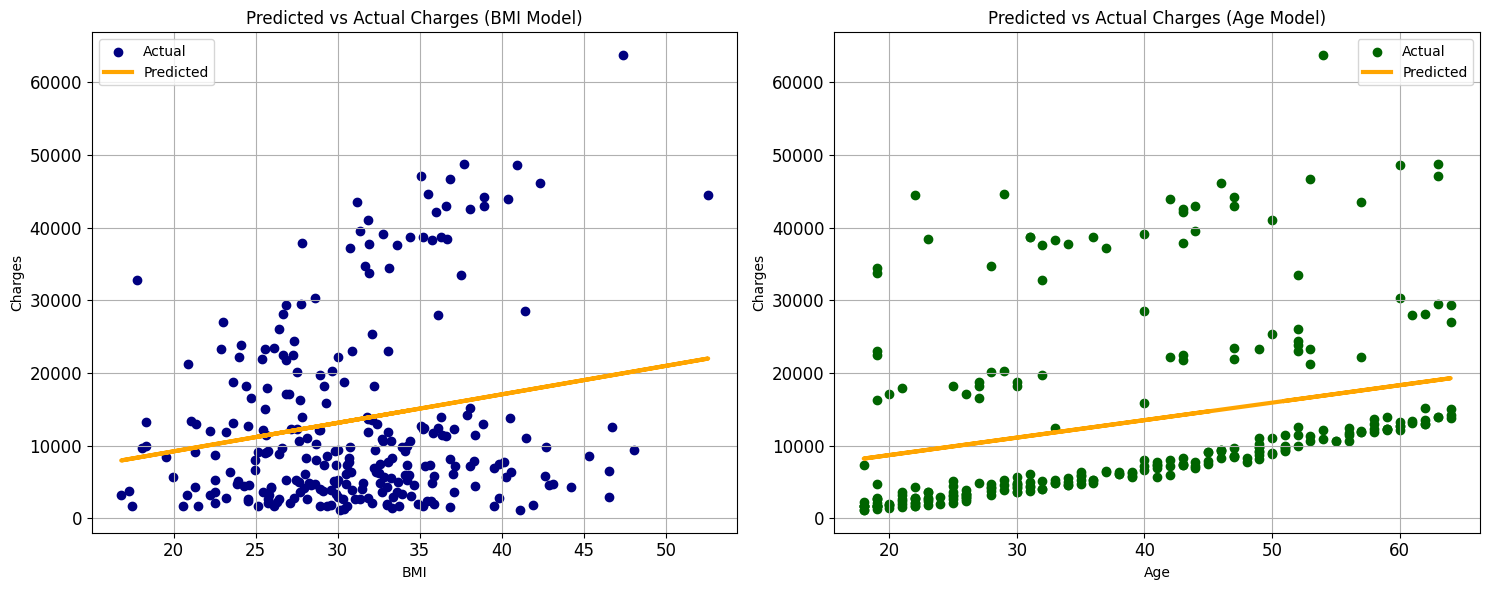

In [175]:
# Create subplots
plt.figure(figsize=(15, 6))

# Plot for BMI model
plt.subplot(1, 2, 1)
plt.scatter(X_test_bmi, y_test_bmi, color='navy', label='Actual')
plt.plot(X_test_bmi, y_pred_bmi, color='orange', linewidth=3, label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Predicted vs Actual Charges (BMI Model)')
plt.legend()
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot for Age model
plt.subplot(1, 2, 2)
plt.scatter(X_test_age, y_test_age, color='darkgreen', label='Actual')
plt.plot(X_test_age, y_pred_age, color='orange', linewidth=3, label='Predicted')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Predicted vs Actual Charges (Age Model)')
plt.legend()
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


6. Hypothesentests (Prüfung, ob die Parameter deines Modells signifikant von Null verschieden sind; z.B. T-Test)

Null and Alternative Hypotheses:<br>
<br>
<br>
Null Hypothesis:<br>

The null hypothesis states that there is no significant relationship between the independent variable and the dependent variable (i.e., the regression coefficient is zero).<br>
<br>
<br>

Alternative Hypothesis:<br>

The alternative hypothesis states that there is a significant relationship between the independent variable and the dependent variable (i.e., the regression coefficient is not zero).


In [177]:
# T-Test

The p-value for the intercept is 1, which means it is not statistically significant.
The p-value for the coefficient of the second independent variable is 0.98265491, indicating that it is not statistically significant.



Based on the t-tests, neither the intercept nor the coefficient for the second independent variable is statistically significant at the 0.05 significance level. This suggests that there is insufficient evidence to conclude that these coefficients are different from zero, meaning that the model may not be a good fit for the data or that the independent variables may not have a significant linear relationship with the dependent variable.

In [176]:
# F-Test
# Perform F-test


Overall, the large F-statistic and very low p-value provide strong evidence that the linear regression model is statistically significant and that the independent variable is significantly associated with the dependent variable in a bivariate analysis.

The F-statistic measures the overall fit of the linear regression model. A larger F-statistic indicates a better fit of the model to the data.
In this case, the F-statistic is exceptionally large, suggesting that the model explains a significant amount of the variability in the dependent variable.

The p-value associated with the F-test represents the probability of observing the data given that the null hypothesis (the model has no explanatory power) is true.
A low p-value (typically less than 0.05) indicates that the model is statistically significant.
In this output, the p-value is approximately zero (0.0), which is well below the conventional threshold of 0.05.
This indicates strong evidence against the null hypothesis and suggests that the linear regression model is statistically significant at any reasonable significance level.

7. Interpretation der Ergebnisse (Schlussfolgerungen ableiten)

xxx